# FLIGHT DELAY PREDICTION

# 1.Data Collection

# 2.Data Preprocessing

 #### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 #### Importing the dataset

In [2]:
dataset=pd.read_csv(r"flightdata.csv")

In [3]:
dataset.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FLIGHT_NUM,ORIGIN,DEST,SCHEDULED_DEP_TIME,ACTUAL_DEP_TIME,DEP_DELAY,SCHEDULED_ARR_TIME,ACTUAL_ARR_TIME,DISTANCE,ARR_DELAY,DELAY
0,2016,1,1,5,1399,ATL,SEA,1905,1907.0,2.0,2143,2102.0,2182,-41.0,NO
1,2016,1,1,5,1476,DTW,MSP,1345,1344.0,-1.0,1435,1439.0,528,4.0,NO
2,2016,1,1,5,1597,ATL,SEA,940,942.0,2.0,1215,1142.0,2182,-33.0,NO
3,2016,1,1,5,1768,SEA,MSP,819,820.0,1.0,1335,1345.0,1399,10.0,NO
4,2016,1,1,5,1823,SEA,DTW,2300,2256.0,-4.0,607,615.0,1927,8.0,NO


#### Checking Correlation

In [4]:
dataset.corr()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FLIGHT_NUM,SCHEDULED_DEP_TIME,ACTUAL_DEP_TIME,DEP_DELAY,SCHEDULED_ARR_TIME,ACTUAL_ARR_TIME,DISTANCE,ARR_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.003095,-0.005027,-0.066573,0.021989,0.022717,0.014460,0.028657,0.019168,0.028921,0.018201
DAY_OF_MONTH,NaN,0.003095,1.000000,0.010415,-0.001812,0.009126,0.007515,-0.020573,0.000857,-0.001956,0.000320,-0.022221
DAY_OF_WEEK,NaN,-0.005027,0.010415,1.000000,-0.004133,0.005299,0.003021,-0.003005,0.012490,0.003068,0.017456,-0.005965
FLIGHT_NUM,NaN,-0.066573,-0.001812,-0.004133,1.000000,-0.036180,-0.043164,-0.017794,-0.081598,-0.078940,0.089529,-0.011054
SCHEDULED_DEP_TIME,NaN,0.021989,0.009126,0.005299,-0.036180,1.000000,0.969636,0.065472,0.559401,0.540363,-0.032432,0.050107
ACTUAL_DEP_TIME,NaN,0.022717,0.007515,0.003021,-0.043164,0.969636,1.000000,0.132455,0.566615,0.554034,-0.039738,0.115019
DEP_DELAY,NaN,0.014460,-0.020573,-0.003005,-0.017794,0.065472,0.132455,1.000000,0.070261,-0.016563,-0.001394,0.935268
SCHEDULED_ARR_TIME,NaN,0.028657,0.000857,0.012490,-0.081598,0.559401,0.566615,0.070261,1.000000,0.844139,0.053558,0.051419
ACTUAL_ARR_TIME,NaN,0.019168,-0.001956,0.003068,-0.078940,0.540363,0.554034,-0.016563,0.844139,1.000000,0.038274,-0.021385


#### Data Visualization

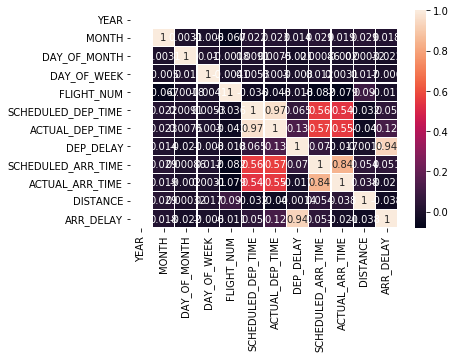

In [5]:
sns.heatmap(dataset.corr(),linewidths=0.1,annot=True)

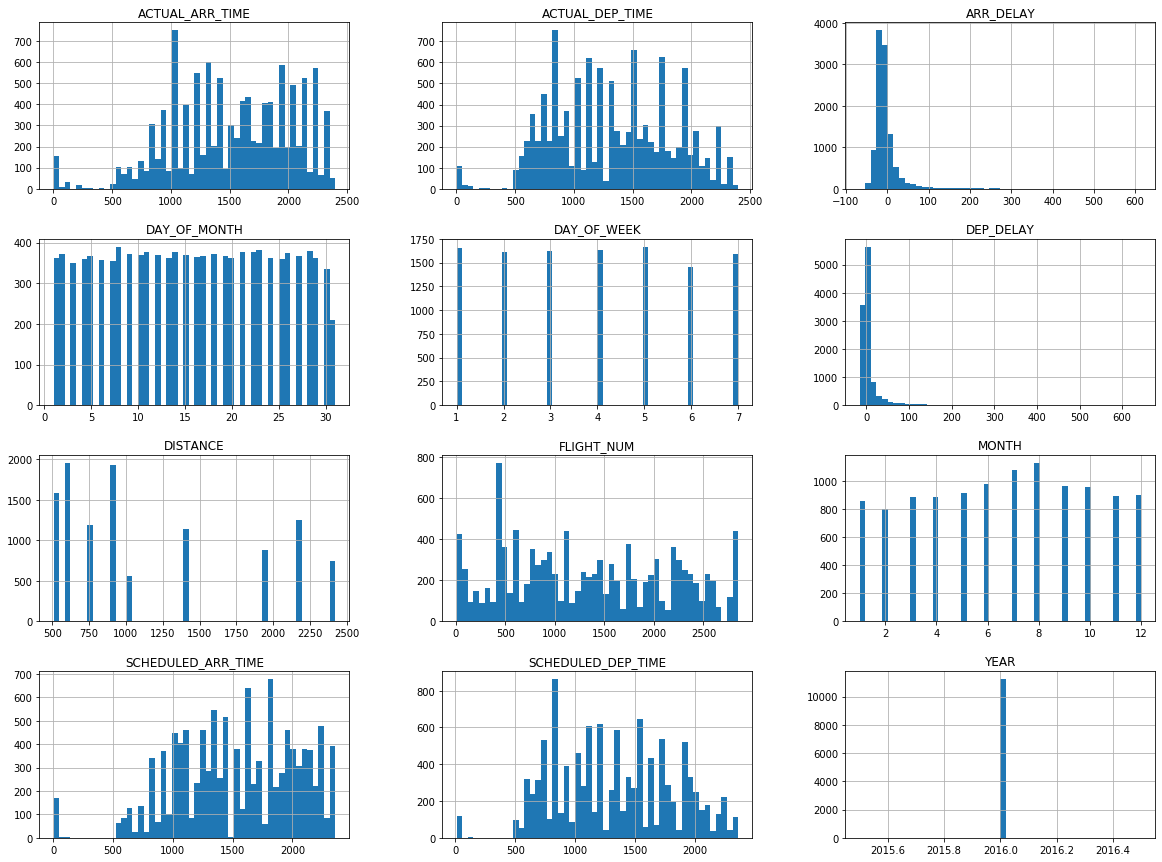

In [6]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Arrival Delays per Month')

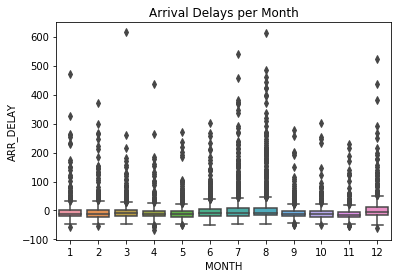

In [7]:
sns.boxplot(dataset["MONTH"],dataset["ARR_DELAY"])
plt.title("Arrival Delays per Month")

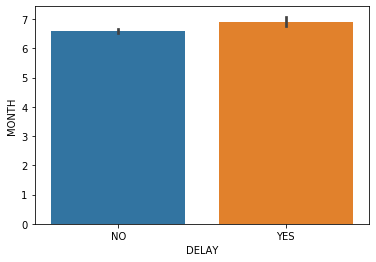

In [8]:
sns.barplot(dataset["DELAY"],dataset["MONTH"])

Text(0.5, 1.0, 'Density Distributions of Arrival Delays')

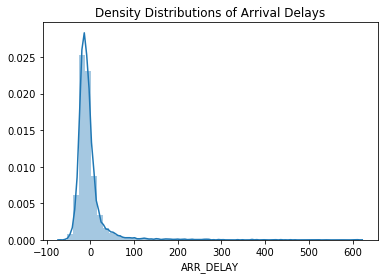

In [9]:
sns.distplot(dataset["ARR_DELAY"]) 
plt.title("Density Distributions of Arrival Delays")

#### Taking care of missing data

In [10]:
dataset.isnull().any()

YEAR                  False
MONTH                 False
DAY_OF_MONTH          False
DAY_OF_WEEK           False
FLIGHT_NUM            False
ORIGIN                False
DEST                  False
SCHEDULED_DEP_TIME    False
ACTUAL_DEP_TIME        True
DEP_DELAY              True
SCHEDULED_ARR_TIME    False
ACTUAL_ARR_TIME        True
DISTANCE              False
ARR_DELAY              True
DELAY                 False
dtype: bool

In [11]:
dataset.drop("DEP_DELAY",axis=1,inplace=True)

In [12]:
dataset["ACTUAL_DEP_TIME"].fillna(dataset["ACTUAL_DEP_TIME"].mode()[0],inplace=True)
dataset["ACTUAL_ARR_TIME"].fillna(dataset["ACTUAL_ARR_TIME"].median(),inplace=True)
dataset["ARR_DELAY"].fillna(dataset["ARR_DELAY"].mean(),inplace=True)

In [13]:
dataset.isnull().any()

YEAR                  False
MONTH                 False
DAY_OF_MONTH          False
DAY_OF_WEEK           False
FLIGHT_NUM            False
ORIGIN                False
DEST                  False
SCHEDULED_DEP_TIME    False
ACTUAL_DEP_TIME       False
SCHEDULED_ARR_TIME    False
ACTUAL_ARR_TIME       False
DISTANCE              False
ARR_DELAY             False
DELAY                 False
dtype: bool

#### Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["ORIGIN"]=le.fit_transform(dataset["ORIGIN"])
dataset["DEST"]=le.fit_transform(dataset["DEST"])
dataset["DELAY"]=le.fit_transform(dataset["DELAY"])

In [15]:
dataset["ORIGIN"].unique()

array([0, 1, 4, 3, 2])

In [16]:
dataset["DEST"].unique()

array([4, 3, 1, 0, 2])

In [17]:
dataset["DELAY"].unique()

array([0, 1])

In [18]:
dataset.head(5)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FLIGHT_NUM,ORIGIN,DEST,SCHEDULED_DEP_TIME,ACTUAL_DEP_TIME,SCHEDULED_ARR_TIME,ACTUAL_ARR_TIME,DISTANCE,ARR_DELAY,DELAY
0,2016,1,1,5,1399,0,4,1905,1907.0,2143,2102.0,2182,-41.0,0
1,2016,1,1,5,1476,1,3,1345,1344.0,1435,1439.0,528,4.0,0
2,2016,1,1,5,1597,0,4,940,942.0,1215,1142.0,2182,-33.0,0
3,2016,1,1,5,1768,4,3,819,820.0,1335,1345.0,1399,10.0,0
4,2016,1,1,5,1823,4,1,2300,2256.0,607,615.0,1927,8.0,0


#### Splitting input,output data  & One Hot Encoding

In [19]:
x=dataset.iloc[:,0:13].values
y=dataset.iloc[:,13:14].values

In [20]:
print(x.shape)
print(y.shape)

(11231, 13)
(11231, 1)


In [21]:
dataset.head(1)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FLIGHT_NUM,ORIGIN,DEST,SCHEDULED_DEP_TIME,ACTUAL_DEP_TIME,SCHEDULED_ARR_TIME,ACTUAL_ARR_TIME,DISTANCE,ARR_DELAY,DELAY
0,2016,1,1,5,1399,0,4,1905,1907.0,2143,2102.0,2182,-41.0,0


In [22]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()
a=one.fit_transform(x[:,5:6]).toarray()
b=one.fit_transform(x[:,6:7]).toarray()
x=np.delete(x,[5,6],axis=1)
x=np.concatenate((b,a,x),axis=1)

In [23]:
x.shape

(11231, 21)

#### Splitting Data into Train and Test

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [25]:
x_train.shape

(7861, 21)

In [26]:
x_test.shape

(3370, 21)

#### Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# 3.Model Building

### Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy",random_state=43)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=43, splitter='best')

### Evaluation

In [29]:
y_pred=dtc.predict(x_test)

In [30]:
y_test

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [31]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [32]:
from sklearn.metrics import accuracy_score
flight_Delay_accuracy=accuracy_score(y_test,y_pred)

In [33]:
flight_Delay_accuracy

0.98486646884273

In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [35]:
cm

array([[2961,    0],
       [  51,  358]], dtype=int64)

In [36]:
import sklearn.metrics as metrics
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)

In [37]:
threshold

array([2, 1, 0])

In [38]:
fpr

array([0., 0., 1.])

In [39]:
tpr

array([0.        , 0.87530562, 1.        ])

Text(0.5, 0, 'fpr')

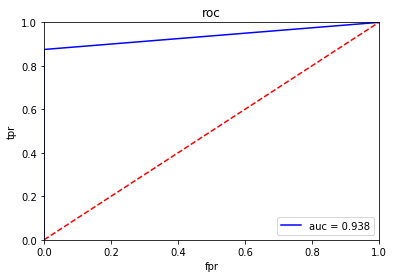

In [40]:
plt.title("roc")
plt.plot(fpr,tpr,'b',label = 'auc = %0.3f'%roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')

In [41]:
dataset.head(1)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FLIGHT_NUM,ORIGIN,DEST,SCHEDULED_DEP_TIME,ACTUAL_DEP_TIME,SCHEDULED_ARR_TIME,ACTUAL_ARR_TIME,DISTANCE,ARR_DELAY,DELAY
0,2016,1,1,5,1399,0,4,1905,1907.0,2143,2102.0,2182,-41.0,0


#### Prediction for the first row inputs


In [42]:
y_p=dtc.predict(sc.transform([[0,0,0,0,1,1,0,0,0,0,2016,1,1,5,1399,1905,1907,2143,2102,2182,-41]]))

In [43]:
y_p

array([0])

#### Random values prediction

In [44]:
y=dtc.predict(sc.transform([[1,0,0,0,0,0,1,0,0,0,2018,2,4,5,334423,1234,1250,2110,2120,1313,10]]))
y

array([0])

In [45]:
y1=dtc.predict(sc.transform([[0,0,1,0,0,0,0,1,0,0,2018,2,4,5,56563,1234,1250,2110,2140,1313,30]]))
y1

array([1])

##### Let's compare this algorithm with logistic regression

## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\91898\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluation

In [47]:
y_pred2=lr.predict(x_test)

In [48]:
log_accuracy=accuracy_score(y_test,y_pred2)

In [49]:
log_accuracy

0.9845697329376855

In [50]:
cm2=confusion_matrix(y_test,y_pred2)

In [51]:
cm2

array([[2961,    0],
       [  52,  357]], dtype=int64)

In [52]:
fpr2,tpr2,threshold=metrics.roc_curve(y_test,y_pred2)
roc_auc2=metrics.auc(fpr2,tpr2)

Text(0.5, 0, 'False positive rate (fpr2)')

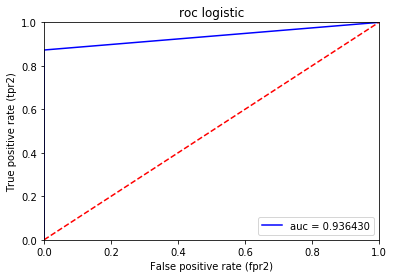

In [53]:
plt.title("roc logistic")
plt.plot(fpr2,tpr2,'b',label='auc = %f'%roc_auc2)
plt.legend(loc="lower right")
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True positive rate (tpr2)')
plt.xlabel('False positive rate (fpr2)')

#### Comparing both the accuracy and roc_auc curve of the models
#### Decisiontree=98.48 , auc=0.938
#### LogisticRegression=98.45 ,auc=0.936
#### There is subtle difference between the both models,so we can consider any of them.